# Unoffical Stable diffusion by StabilityAI

Leaked stable diffusion weights collab for all humans

twitter haters - fuck yourself

idk, it uses 16+gb ram so you should use collab pro/own car. maybe i will fix it, maybe stability ai gonna fix it

[stability ai blogpost](https://stability-ai.webpkgcache.com/doc/-/s/stability.ai/beta-signup-form)

[offical github](https://github.com/CompVis/stable-diffusion)

Now With
(TechnoMancer) Added Image Prompt Utility,
(BlancDeOfficial) Added Google Drive integration, Random Seed & Friendlier User interface

______
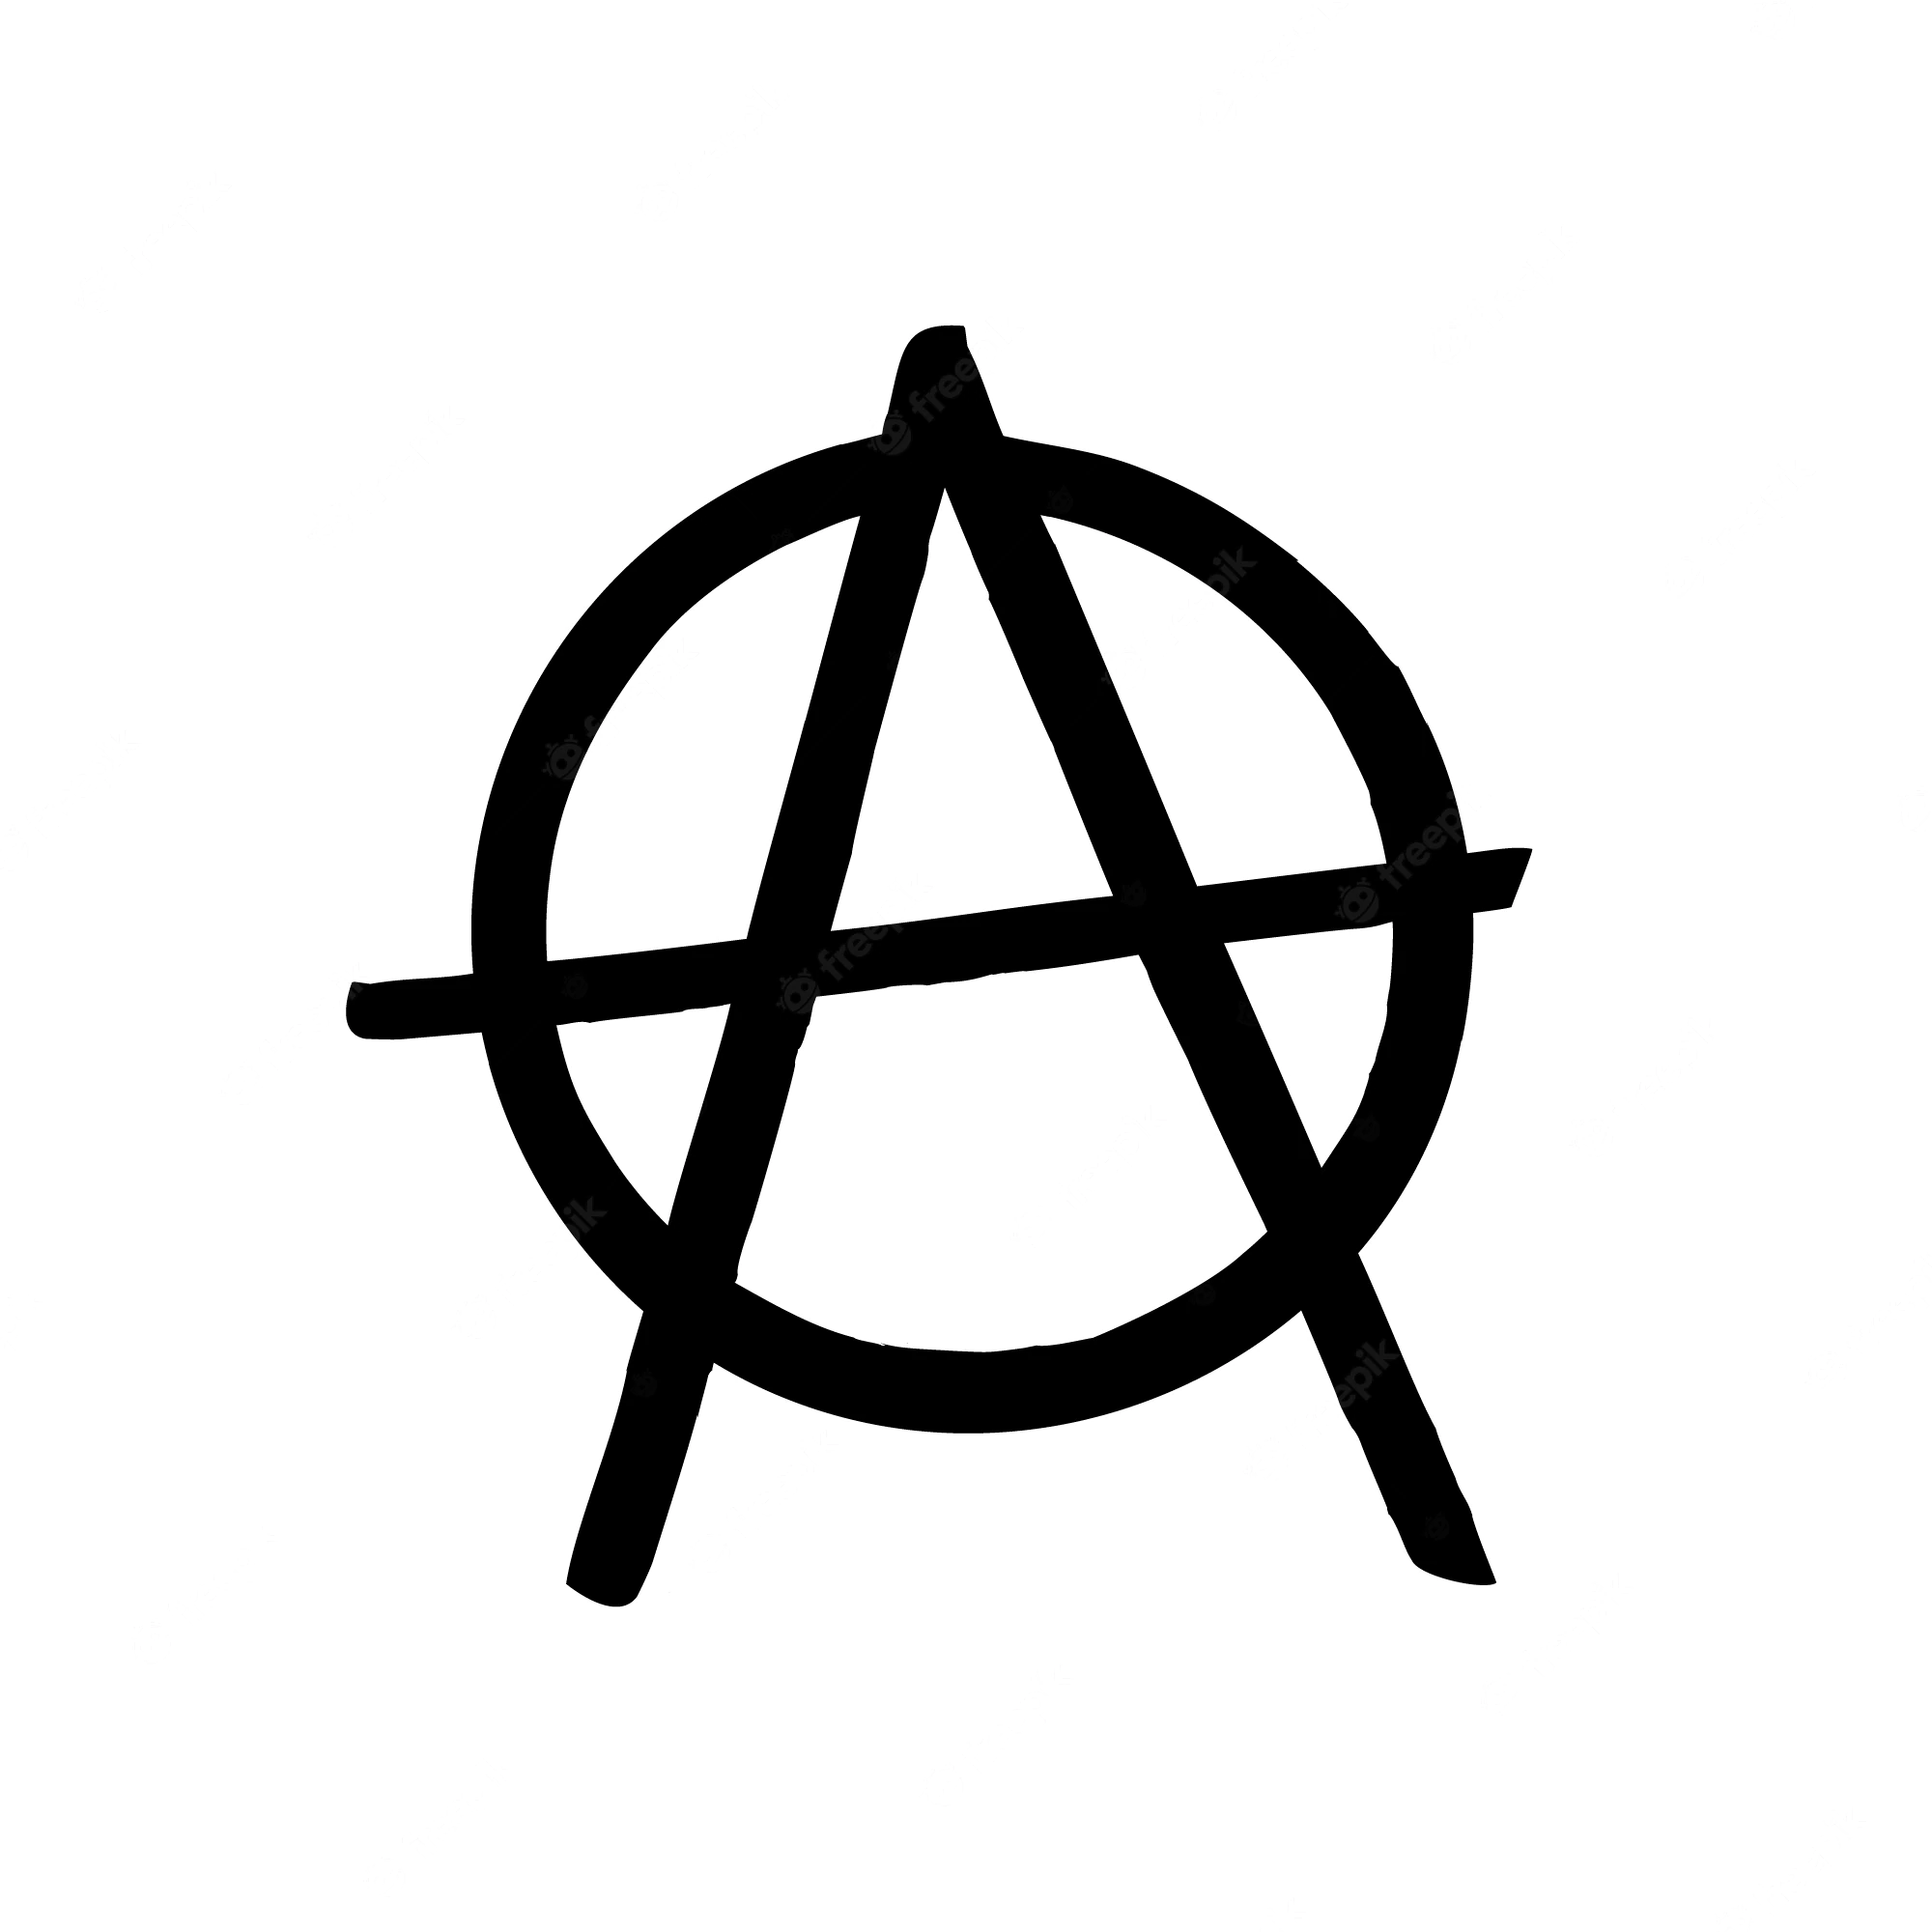

In [ ]:
#@title 1.1 Check GPU Status
import subprocess
simple_nvidia_smi_display = False#@param {type:"boolean"}
if simple_nvidia_smi_display:
    #!nvidia-smi
    nvidiasmi_output = subprocess.run(['nvidia-smi', '-L'], stdout=subprocess.PIPE).stdout.decode('utf-8')
    print(nvidiasmi_output)
else:
    #!nvidia-smi -i 0 -e 0
    nvidiasmi_output = subprocess.run(['nvidia-smi'], stdout=subprocess.PIPE).stdout.decode('utf-8')
    print(nvidiasmi_output)
    nvidiasmi_ecc_note = subprocess.run(['nvidia-smi', '-i', '0', '-e', '0'], stdout=subprocess.PIPE).stdout.decode('utf-8')
    print(nvidiasmi_ecc_note)

Sat Aug 20 13:40:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#@title 1.2 Prepare Folders
import subprocess, os, sys, ipykernel


def wget(url, outputdir):
    res = subprocess.run(['wget', url, '-P', f'{outputdir}'], stdout=subprocess.PIPE).stdout.decode('utf-8')
    print(res)


try:
    from google.colab import drive
    print("Google Colab detected. Using Google Drive.")
    is_colab = True
    #@markdown If you connect your Google Drive, you can save the final image of each run on your drive.
    google_drive = True #@param {type:"boolean"}
    #@markdown Click here if you'd like to save the diffusion model checkpoint file to (and/or load from) your Google Drive:
    save_models_to_google_drive = True #@param {type:"boolean"}
except:
    is_colab = False
    google_drive = False
    save_models_to_google_drive = False
    print("Google Colab not detected.")

if is_colab:
    if google_drive is True:
        drive.mount('/content/drive')
        root_path = '/content/drive/MyDrive/AI/Stable_Diffusion'
    else:
        root_path = '/content'
else:
    root_path = os.getcwd()

import os
def createPath(filepath):
    os.makedirs(filepath, exist_ok=True)

outDirPath = f'{root_path}/images_out'
createPath(outDirPath)

PROJECT_DIR = os.path.abspath(os.getcwd())

if is_colab:
    if google_drive and not save_models_to_google_drive or not google_drive:
        model_path = '/content/models'
        createPath(model_path)
    if google_drive and save_models_to_google_drive:
        model_path = f'{root_path}/models'
        createPath(model_path)
else:
    model_path = f'{root_path}/models'
    createPath(model_path)

# libraries = f'{root_path}/libraries'
# createPath(libraries)


Google Colab detected. Using Google Drive.
Mounted at /content/drive


In [ ]:
!git clone https://github.com/CompVis/stable-diffusion

Cloning into 'stable-diffusion'...
remote: Enumerating objects: 270, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 270 (delta 39), reused 27 (delta 27), pack-reused 206
Receiving objects: 100% (270/270), 42.33 MiB | 13.31 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [ ]:
cd stable-diffusion/

/content/stable-diffusion


In [ ]:
#@title 1.4 Mass pip installs
%%capture
!pip install albumentations==0.4.3
!pip install  opencv-python==4.1.2.30
!pip install pudb==2019.2
!pip install imageio==2.9.0
!pip install imageio-ffmpeg==0.4.2
#!pip install pytorch-lightning==1.4.2
!pip install  pytorch-lightning 
!pip install omegaconf==2.1.1
!pip install test-tube>=0.7.5
!pip install streamlit>=0.73.1
!pip install einops==0.3.0
!pip install torch-fidelity==0.3.0
!pip install transformers==4.19.2
!pip install -e git+https://github.com/CompVis/taming-transformers.git@master#egg=taming-transformers
!pip install -e git+https://github.com/openai/CLIP.git@main#egg=clip
!pip install kornia

In [ ]:
mkdir  models/ldm/stable-diffusion-v1/

In [ ]:
!wget https://drinkordiecdn.lol/sd-v1-3-full-ema.ckpt

In [ ]:
mv 'sd-v1-3-full-ema.ckpt' models/ldm/stable-diffusion-v1/model.ckpt

In [ ]:
import os
os.kill(os.getpid(), 9)

After running the above code once, you won't need to rerun it

There is also a code breaker at this point, so you need to run the next part manually

In [ ]:
cd stable-diffusion/

/content/stable-diffusion


In [ ]:
#@title 1.5 Mass Imports
import argparse, os, sys, glob, gc
import PIL
import torch
import numpy as np
from omegaconf import OmegaConf
from PIL import Image
from tqdm import tqdm, trange
from itertools import islice
from einops import rearrange, repeat
from torchvision.utils import make_grid
import time
from pytorch_lightning import seed_everything
from torch import autocast
from contextlib import contextmanager, nullcontext

from ldm.util import instantiate_from_config
from ldm.models.diffusion.ddim import DDIMSampler
from ldm.models.diffusion.plms import PLMSSampler



In [ ]:
#@title 1.6 Defining Functions
def chunk(it, size):
    it = iter(it)
    return iter(lambda: tuple(islice(it, size)), ())


def load_model_from_config(config, ckpt, verbose=False):
    print(f"Loading model from {ckpt}")
    pl_sd = torch.load(ckpt, map_location="cuda:0")
    if "global_step" in pl_sd:
        print(f"Global Step: {pl_sd['global_step']}")
    sd = pl_sd["state_dict"]
    model = instantiate_from_config(config.model)
    m, u = model.load_state_dict(sd, strict=False)
    if len(m) > 0 and verbose:
        print("missing keys:")
        print(m)
    if len(u) > 0 and verbose:
        print("unexpected keys:")
        print(u)

    model.cuda()
    model.eval()
    return model




The Parts Below contain parameters that you are recommeneded to change

Remember to rerun from this point if you eit any of the parameters

In [ ]:
#@title 2.1 Parameters
import random
class config():
      def __init__(self):
        
        self.outdir = "/content/drive/MyDrive/AI/Stable_Diffusion/images_out"
        self.ddim_steps = 100 #@param {type:"integer"}
        self.plms = True
        
        self.laion400m = False
        self.seed = random.randint(0, 2**32)
        self.config = 'configs/stable-diffusion/v1-inference.yaml'
        self.ckpt = 'models/ldm/stable-diffusion-v1/model.ckpt'
        self.precision = 'autocast'
        self.n_rows = 0 #@param {type:"integer"}
        self.fixed_code = True
        self.from_file = False
        self.C = 4 #@param {type:"number"}
        self.H = 256 #@param {type:"integer"}
        self.W = 256 #@param {type:"integer"}
        self.f = 4 #@param {type:"number"}
        self.n_samples = 3 #@param {type:"integer"}
        self.n_iter = 1 #@param {type:"integer"}
        self.scale = 7.5 #@param {type:"number"}
        self.ddim_eta = 0.0
        self.skip_save = False
        self.skip_grid = False
        #For img2img
        self.strength = 0.8 #@param {type:"number"}

      
opt = config()

In [ ]:
#@title 2.2 Compiling Parameters
if opt.laion400m:
        print("Falling back to LAION 400M model...")
        opt.config = "configs/latent-diffusion/txt2img-1p4B-eval.yaml"
        opt.ckpt = "models/ldm/text2img-large/model.ckpt"
        opt.outdir = "/content/drive/MyDrive/AI/Stable_Diffusion/images_out"

seed_everything(opt.seed)

config = OmegaConf.load(f"{opt.config}")



INFO:pytorch_lightning.utilities.seed:Global seed set to 1770196702


In [ ]:
#@title 2.3 Loading Model
model = load_model_from_config(config, f"{opt.ckpt}")
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = model.to(device)

Loading model from models/ldm/stable-diffusion-v1/model.ckpt
Global Step: 440000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels


Downloading:   0%|          | 0.00/939k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/512k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/905 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.31k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.59G [00:00<?, ?B/s]

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.8.layer_norm2.weight', 'vision_model.encoder.layers.6.layer_norm2.weight', 'vision_model.encoder.layers.16.mlp.fc1.weight', 'vision_model.encoder.layers.14.self_attn.k_proj.bias', 'vision_model.encoder.layers.17.layer_norm2.bias', 'vision_model.encoder.layers.9.mlp.fc1.weight', 'vision_model.encoder.layers.15.layer_norm1.bias', 'vision_model.encoder.layers.22.layer_norm1.bias', 'vision_model.encoder.layers.2.self_attn.q_proj.bias', 'vision_model.encoder.layers.2.self_attn.q_proj.weight', 'vision_model.encoder.layers.12.self_attn.out_proj.weight', 'vision_model.encoder.layers.7.mlp.fc1.bias', 'vision_model.encoder.layers.18.self_attn.v_proj.weight', 'vision_model.encoder.layers.11.mlp.fc1.bias', 'vision_model.encoder.layers.6.self_attn.v_proj.weight', 'text_projection.weight', 'vision_model.encoder.layers.7.mlp.fc2.bias', 'vision_model.encode

In [ ]:
#@title 2.4 Defining Function for Image loading
def load_img(path):
    image = Image.open(path).convert("RGB")
    w, h = image.size
    print(f"loaded input image of size ({w}, {h}) from {path}")
    w, h = map(lambda x: x - x % 32, (w, h))  # resize to integer multiple of 32
    image = image.resize((w, h), resample=PIL.Image.LANCZOS)
    image = np.array(image).astype(np.float32) / 255.0
    image = image[None].transpose(0, 3, 1, 2)
    image = torch.from_numpy(image)
    return 2.*image - 1.

In [ ]:
#@title 2.5 Defining Function for generation w/out Image Prompt
def generate(opt,prompt):
    #device = 'cuda'
    if opt.plms:
        sampler = PLMSSampler(model)
    else:
        sampler = DDIMSampler(model)
    images = []
    os.makedirs(opt.outdir, exist_ok=True)
    outpath = opt.outdir

    batch_size = opt.n_samples
    n_rows = opt.n_rows if opt.n_rows > 0 else batch_size
    if not opt.from_file:

        assert prompt is not None
        data = [batch_size * [prompt]]

    else:
        print(f"reading prompts from {opt.from_file}")
        with open(opt.from_file, "r") as f:
            data = f.read().splitlines()
            data = list(chunk(data, batch_size))

    sample_path = os.path.join(outpath, "samples")
    os.makedirs(sample_path, exist_ok=True)
    base_count = len(os.listdir(sample_path))
    grid_count = len(os.listdir(outpath)) - 1

    start_code = None
    if opt.fixed_code:
        start_code = torch.randn([opt.n_samples, opt.C, opt.H // opt.f, opt.W // opt.f], device=device)

    precision_scope = autocast if opt.precision=="autocast" else nullcontext
    with torch.no_grad():
        with precision_scope("cuda"):
            with model.ema_scope():
                #tic = time.time()
                all_samples = list()
                for n in trange(opt.n_iter, desc="Sampling"):
                    for prompts in tqdm(data, desc="data"):
                        uc = None
                        if opt.scale != 1.0:
                            uc = model.get_learned_conditioning(batch_size * [""])
                        if isinstance(prompts, tuple):
                            prompts = list(prompts)
                        c = model.get_learned_conditioning(prompts)
                        shape = [opt.C, opt.H // opt.f, opt.W // opt.f]
                        samples_ddim, _ = sampler.sample(S=opt.ddim_steps,
                                                         conditioning=c,
                                                         batch_size=opt.n_samples,
                                                         shape=shape,
                                                         verbose=False,
                                                         unconditional_guidance_scale=opt.scale,
                                                         unconditional_conditioning=uc,
                                                         eta=opt.ddim_eta,
                                                         x_T=start_code)

                        x_samples_ddim = model.decode_first_stage(samples_ddim)
                        x_samples_ddim = torch.clamp((x_samples_ddim + 1.0) / 2.0, min=0.0, max=1.0)

                        if not opt.skip_save:
                            for x_sample in x_samples_ddim:
                                x_sample = 255. * rearrange(x_sample.cpu().numpy(), 'c h w -> h w c')
                                images +=[Image.fromarray(x_sample.astype(np.uint8))]
                                Image.fromarray(x_sample.astype(np.uint8)).save(
                                    os.path.join(sample_path, f"{base_count:05}.png"))
                                base_count += 1

                        if not opt.skip_grid:
                            all_samples.append(x_samples_ddim)

                if not opt.skip_grid:
                    # additionally, save as grid
                    grid = torch.stack(all_samples, 0)
                    grid = rearrange(grid, 'n b c h w -> (n b) c h w')
                    grid = make_grid(grid, nrow=n_rows)

                    # to image
                    grid = 255. * rearrange(grid, 'c h w -> h w c').cpu().numpy()
                    image = Image.fromarray(grid.astype(np.uint8)).save(os.path.join(outpath, f'grid-{grid_count:04}.png'))
                    Image.fromarray(grid.astype(np.uint8)).save(os.path.join(outpath, f'grid-{grid_count:04}.png'))
                    grid_count += 1
                print(f'Your images are here {outpath}')
                return images

In [ ]:
#@title 2.6 Defining Function for generation w Image Prompt
def img2img(opt,prompt,initImg):
   # device = 'cuda'

    sampler = DDIMSampler(model)
    images = []
    os.makedirs(opt.outdir, exist_ok=True)
    outpath = opt.outdir

    batch_size = opt.n_samples
    n_rows = opt.n_rows if opt.n_rows > 0 else batch_size
    if not opt.from_file:

        assert prompt is not None
        data = [batch_size * [prompt]]

    else:
        print(f"reading prompts from {opt.from_file}")
        with open(opt.from_file, "r") as f:
            data = f.read().splitlines()
            data = list(chunk(data, batch_size))

    sample_path = os.path.join(outpath, "samples")
    os.makedirs(sample_path, exist_ok=True)
    base_count = len(os.listdir(sample_path))
    grid_count = len(os.listdir(outpath)) - 1

    assert os.path.isfile(initImg)
    init_image = load_img(initImg).to(device)
    init_image = repeat(init_image, '1 ... -> b ...', b=batch_size)
    init_latent = model.get_first_stage_encoding(model.encode_first_stage(init_image))  # move to latent space
    sampler.make_schedule(ddim_num_steps=opt.ddim_steps, ddim_eta=opt.ddim_eta, verbose=False)
    assert 0. <= opt.strength <= 1., 'can only work with strength in [0.0, 1.0]'
    t_enc = int(opt.strength * opt.ddim_steps)
    print(f"target t_enc is {t_enc} steps")

    precision_scope = autocast if opt.precision=="autocast" else nullcontext
    with torch.no_grad():
        with precision_scope("cuda"):
            with model.ema_scope():
                #tic = time.time()
                all_samples = list()
                for n in trange(opt.n_iter, desc="Sampling"):
                    for prompts in tqdm(data, desc="data"):
                        uc = None
                        if opt.scale != 1.0:
                            uc = model.get_learned_conditioning(batch_size * [""])
                        if isinstance(prompts, tuple):
                            prompts = list(prompts)
                        c = model.get_learned_conditioning(prompts)
	                        # encode (scaled latent)
                        z_enc = sampler.stochastic_encode(init_latent, torch.tensor([t_enc]*batch_size).to(device))
                        # decode it
                        samples = sampler.decode(z_enc, c, t_enc, unconditional_guidance_scale=opt.scale,
                                                 unconditional_conditioning=uc,)
                        x_samples = model.decode_first_stage(samples)
                        x_samples = torch.clamp((x_samples + 1.0) / 2.0, min=0.0, max=1.0)
                        if not opt.skip_save:
                            for x_sample in x_samples:
                                x_sample = 255. * rearrange(x_sample.cpu().numpy(), 'c h w -> h w c')
                                images +=[Image.fromarray(x_sample.astype(np.uint8))]
                                Image.fromarray(x_sample.astype(np.uint8)).save(
                                    os.path.join(sample_path, f"{base_count:05}.png"))
                                base_count += 1
                        all_samples.append(x_samples)

                if not opt.skip_grid:
                    # additionally, save as grid
                    grid = torch.stack(all_samples, 0)
                    grid = rearrange(grid, 'n b c h w -> (n b) c h w')
                    grid = make_grid(grid, nrow=n_rows)

                    # to image
                    grid = 255. * rearrange(grid, 'c h w -> h w c').cpu().numpy()
                    image = Image.fromarray(grid.astype(np.uint8)).save(os.path.join(outpath, f'grid-{grid_count:04}.png'))
                    Image.fromarray(grid.astype(np.uint8)).save(os.path.join(outpath, f'grid-{grid_count:04}.png'))
                    grid_count += 1
                print(f'Your images are here {outpath}')
                return images



---
Once you've run the code up to this point, you can just do generations from here without going back and reloading the model over and over.


In [ ]:
#@title Final Run with Main Parameter
prompt = "beastkin catgirl wearing hanbok, white hair, gold eyes, fantasy, han so - hee, friendly, pure, perfect face, blue eyes, highly detailed, masterpiece, artstation, art by degas and emika lightweaver and antoine collignon and akihiko yoshida" #@param {type:"string"}
url = "Leave this blank if you don't want to use a base image" #@param {type:"string"}

Run_Repetitions = 10 #@param {type : "integer"}

for i in range(0, Run_Repetitions):
  initImg = !wget -nv $url 2>&1 |cut -d\" -f2
  if os.path.isfile(initImg[0]):
    images = img2img(opt, prompt=prompt, initImg=initImg[0])
  else:
    images = generate(opt, prompt=prompt)

data:   0%|          | 0/1 [00:00<?, ?it/s]

Data shape for PLMS sampling is (3, 4, 64, 64)
Running PLMS Sampling with 100 timesteps




PLMS Sampler:   0%|          | 0/100 [00:00<?, ?it/s]

PLMS Sampler:   1%|          | 1/100 [00:05<09:15,  5.61s/it]

PLMS Sampler:   2%|▏         | 2/100 [00:06<04:30,  2.76s/it]

PLMS Sampler:   3%|▎         | 3/100 [00:07<02:59,  1.85s/it]

PLMS Sampler:   4%|▍         | 4/100 [00:07<02:16,  1.42s/it]

PLMS Sampler:   5%|▌         | 5/100 [00:08<01:52,  1.18s/it]

PLMS Sampler:   6%|▌         | 6/100 [00:09<01:38,  1.04s/it]

PLMS Sampler:   7%|▋         | 7/100 [00:10<01:28,  1.05it/s]

PLMS Sampler:   8%|▊         | 8/100 [00:10<01:22,  1.12it/s]

PLMS Sampler:   9%|▉         | 9/100 [00:11<01:17,  1.17it/s]

PLMS Sampler:  10%|█         | 10/100 [00:12<01:14,  1.21it/s]

PLMS Sampler:  11%|█         | 11/100 [00:13<01:12,  1.23it/s]

PLMS Sampler:  12%|█▏        | 12/100 [00:14<01:10,  1.25it/s]

PLMS Sampler:  13%|█▎        | 13/100 [00:14<01:08,  1.26it/s]

PLMS Sampler:  14%|█▍        | 14/100 [00:15<01:07,  1.27it/s]

PLMS Sampler:  15%|█▌        | 15/100 [00:16<01:06,  1.2

Your images are here /content/drive/MyDrive/AI/Stable_Diffusion/images_out


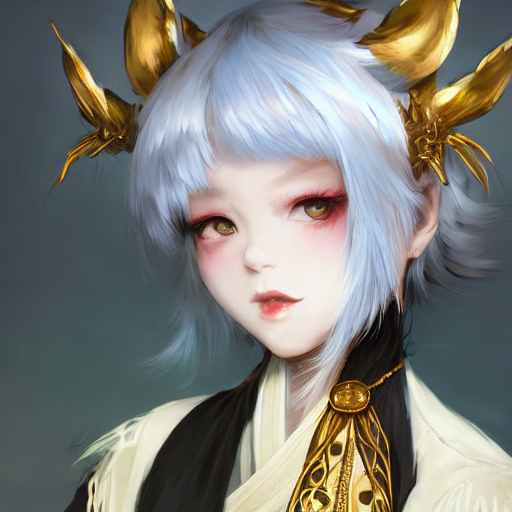

In [ ]:
images[0]

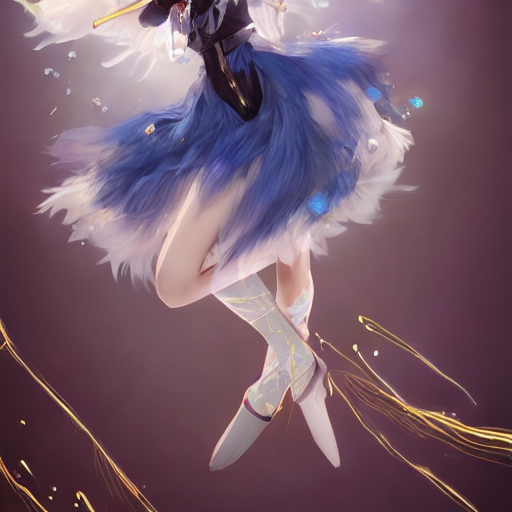

In [ ]:
images[1]

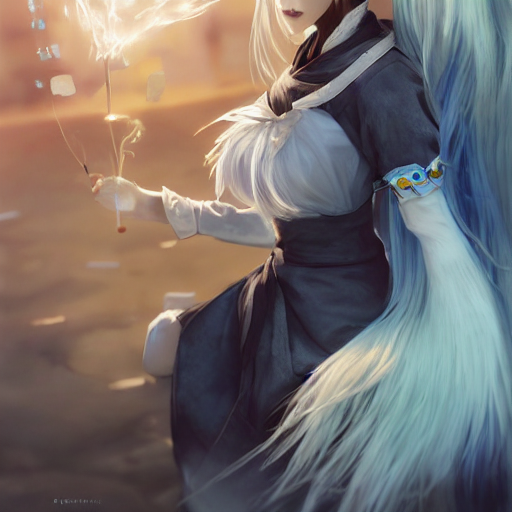

In [ ]:
images[2]



---


This next block is just garbage collection to save the session in case of crashes. If you're stuck at the VRAM cap and unable to generate anything, uncomment the model line and run the block, then rerun from 2.3

In [ ]:
#model = None
gc.collect()
torch.cuda.empty_cache()